In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
import math
import matplotlib.pyplot as plt

In [2]:
FILE_IN = "./data/combined_data.csv"
df = pd.read_csv(FILE_IN)
print("Total number: ",len(df))
df.head()

Total number:  52714


/Users/Strawberry/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,zpid,street,zip,city,state,latitude,longitude,FIPScounty,propertyType,...,edu_mean,edu_max,edu_min,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018
0,0,251033583,8017 Bestride Bnd,78744,AUSTIN,TX,30.186200,-97.738800,48453.0,NaN,...,55.667035,63.07768,48.25639,854841,875463,901734,921545,939768,951750,964254
1,1,29343368,4191 Westlake Dr,78746,AUSTIN,TX,30.333213,-97.799519,48453.0,NaN,...,92.643080,92.64308,92.64308,854841,875463,901734,921545,939768,951750,964254
2,2,29349366,6203 Shadow Mountain Dr,78731,AUSTIN,TX,30.348746,-97.760890,48453.0,NaN,...,6.943352,16.22703,3.62122,854841,875463,901734,921545,939768,951750,964254
3,3,29467905,5304 China Berry Rd,78744,AUSTIN,TX,30.193234,-97.737353,48453.0,NaN,...,55.667035,63.07768,48.25639,854841,875463,901734,921545,939768,951750,964254
4,4,29499672,8968 W Hove Loop,78749,AUSTIN,TX,30.200092,-97.854377,48453.0,NaN,...,42.879144,96.09233,4.95380,854841,875463,901734,921545,939768,951750,964254


In [5]:
for var in df.columns[:]:
    print(var)

Unnamed: 0
zpid
street
zip
city
state
latitude
longitude
FIPScounty
propertyType
yearBuilt
lotSizeSqFt
finishedSqFt
bathrooms
bedrooms
lastSoldDate
lastSoldPrice
zestimatePrice
Lat
Lon
Wage_MED_12
Wage_AVG_12
Wage_MED_13
Wage_AVG_13
Wage_MED_14
Wage_AVG_14
Wage_MED_15
Wage_AVG_15
Wage_MED_16
Wage_AVG_16
weather_jan
weather_feb
weather_mar
weather_apr
weather_may
weather_jun
weather_jul
weather_aug
weather_sep
weather_oct
weather_nov
weather_dec
actual_2012_aggravated-assault
actual_2012_arson
actual_2012_burglary
actual_2012_homicide
actual_2012_human-trafficing
actual_2012_larceny
actual_2012_motor-vehicle-theft
actual_2012_property-crime
actual_2012_rape
actual_2012_rape-legacy
actual_2012_robbery
actual_2012_violent-crime
actual_2013_aggravated-assault
actual_2013_arson
actual_2013_burglary
actual_2013_homicide
actual_2013_human-trafficing
actual_2013_larceny
actual_2013_motor-vehicle-theft
actual_2013_property-crime
actual_2013_rape
actual_2013_rape-legacy
actual_2013_robbery
actua

In [6]:
# data preprocessing
target = "zestimatePrice"
features = df.columns[20:].values
features = np.append(features,["yearBuilt","finishedSqFt","bathrooms","bedrooms"])

colums = np.append(features, [target])
df_data = df[colums]

print("total number: ", len(df_data))
df_data = df_data.dropna()
print("number without nan: ",len(df_data))

df_data.head()

total number:  52714
number without nan:  52322


,Wage_MED_12,Wage_AVG_12,Wage_MED_13,Wage_AVG_13,Wage_MED_14,Wage_AVG_14,Wage_MED_15,Wage_AVG_15,Wage_MED_16,Wage_AVG_16,...,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,yearBuilt,finishedSqFt,bathrooms,bedrooms,zestimatePrice
0,70175.0,70526.0,66331.0,73484.0,66331.0,73016.0,65229.0,75089.0,76294.0,83922.0,...,901734,921545,939768,951750,964254,2019.0,2487.0,4.0,4,401942
1,70175.0,70526.0,66331.0,73484.0,66331.0,73016.0,65229.0,75089.0,76294.0,83922.0,...,901734,921545,939768,951750,964254,2002.0,6135.0,6.0,5,2019998
2,70175.0,70526.0,66331.0,73484.0,66331.0,73016.0,65229.0,75089.0,76294.0,83922.0,...,901734,921545,939768,951750,964254,1977.0,2868.0,4.0,5,807984
3,70175.0,70526.0,66331.0,73484.0,66331.0,73016.0,65229.0,75089.0,76294.0,83922.0,...,901734,921545,939768,951750,964254,2000.0,1485.0,2.0,4,231655
4,70175.0,70526.0,66331.0,73484.0,66331.0,73016.0,65229.0,75089.0,76294.0,83922.0,...,901734,921545,939768,951750,964254,2000.0,1501.0,2.0,3,391905


In [9]:
import matplotlib.ticker as ticker

def showCorr(cols):
    cols = cols + ["zestimatePrice"]
    df_plot = df_data[cols]
    
    size = len(cols)*0.8
    fig = plt.figure(figsize=(size, size))
    ax = fig.add_subplot(111)
    cax = ax.matshow(df_plot[cols].corr(), cmap='RdBu')
    cax.set_clim(-1, 1);
    #plt.title('Correlation Matrix\n\n\n')
    fig.colorbar(cax)
    ax.set_xticklabels([""]+cols, rotation=45, ha="left")
    ax.set_yticklabels([""]+cols)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.show()


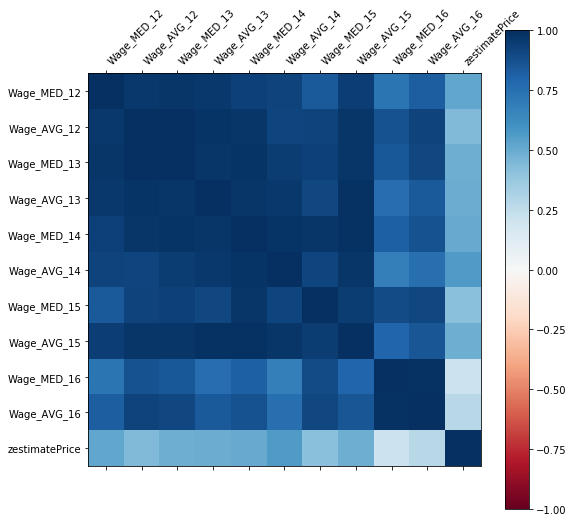

In [10]:
columns = list(df_data.columns.values[0:10])
showCorr(columns)

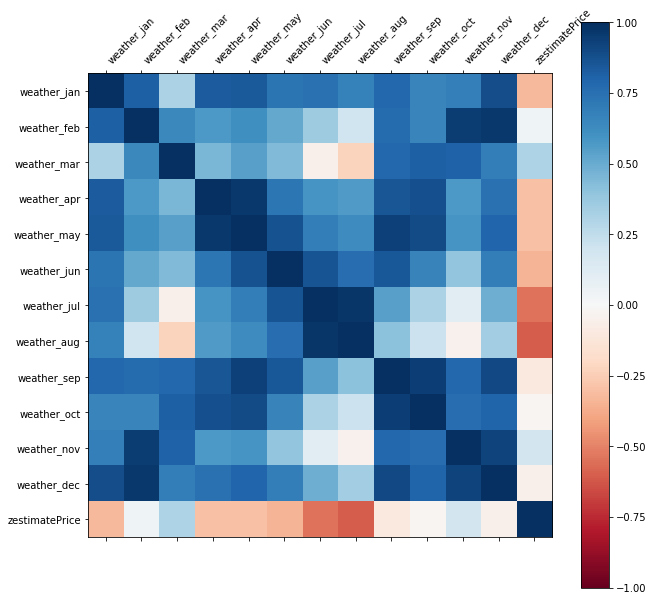

In [11]:
columns = list(df_data.columns.values[10:22])
showCorr(columns)

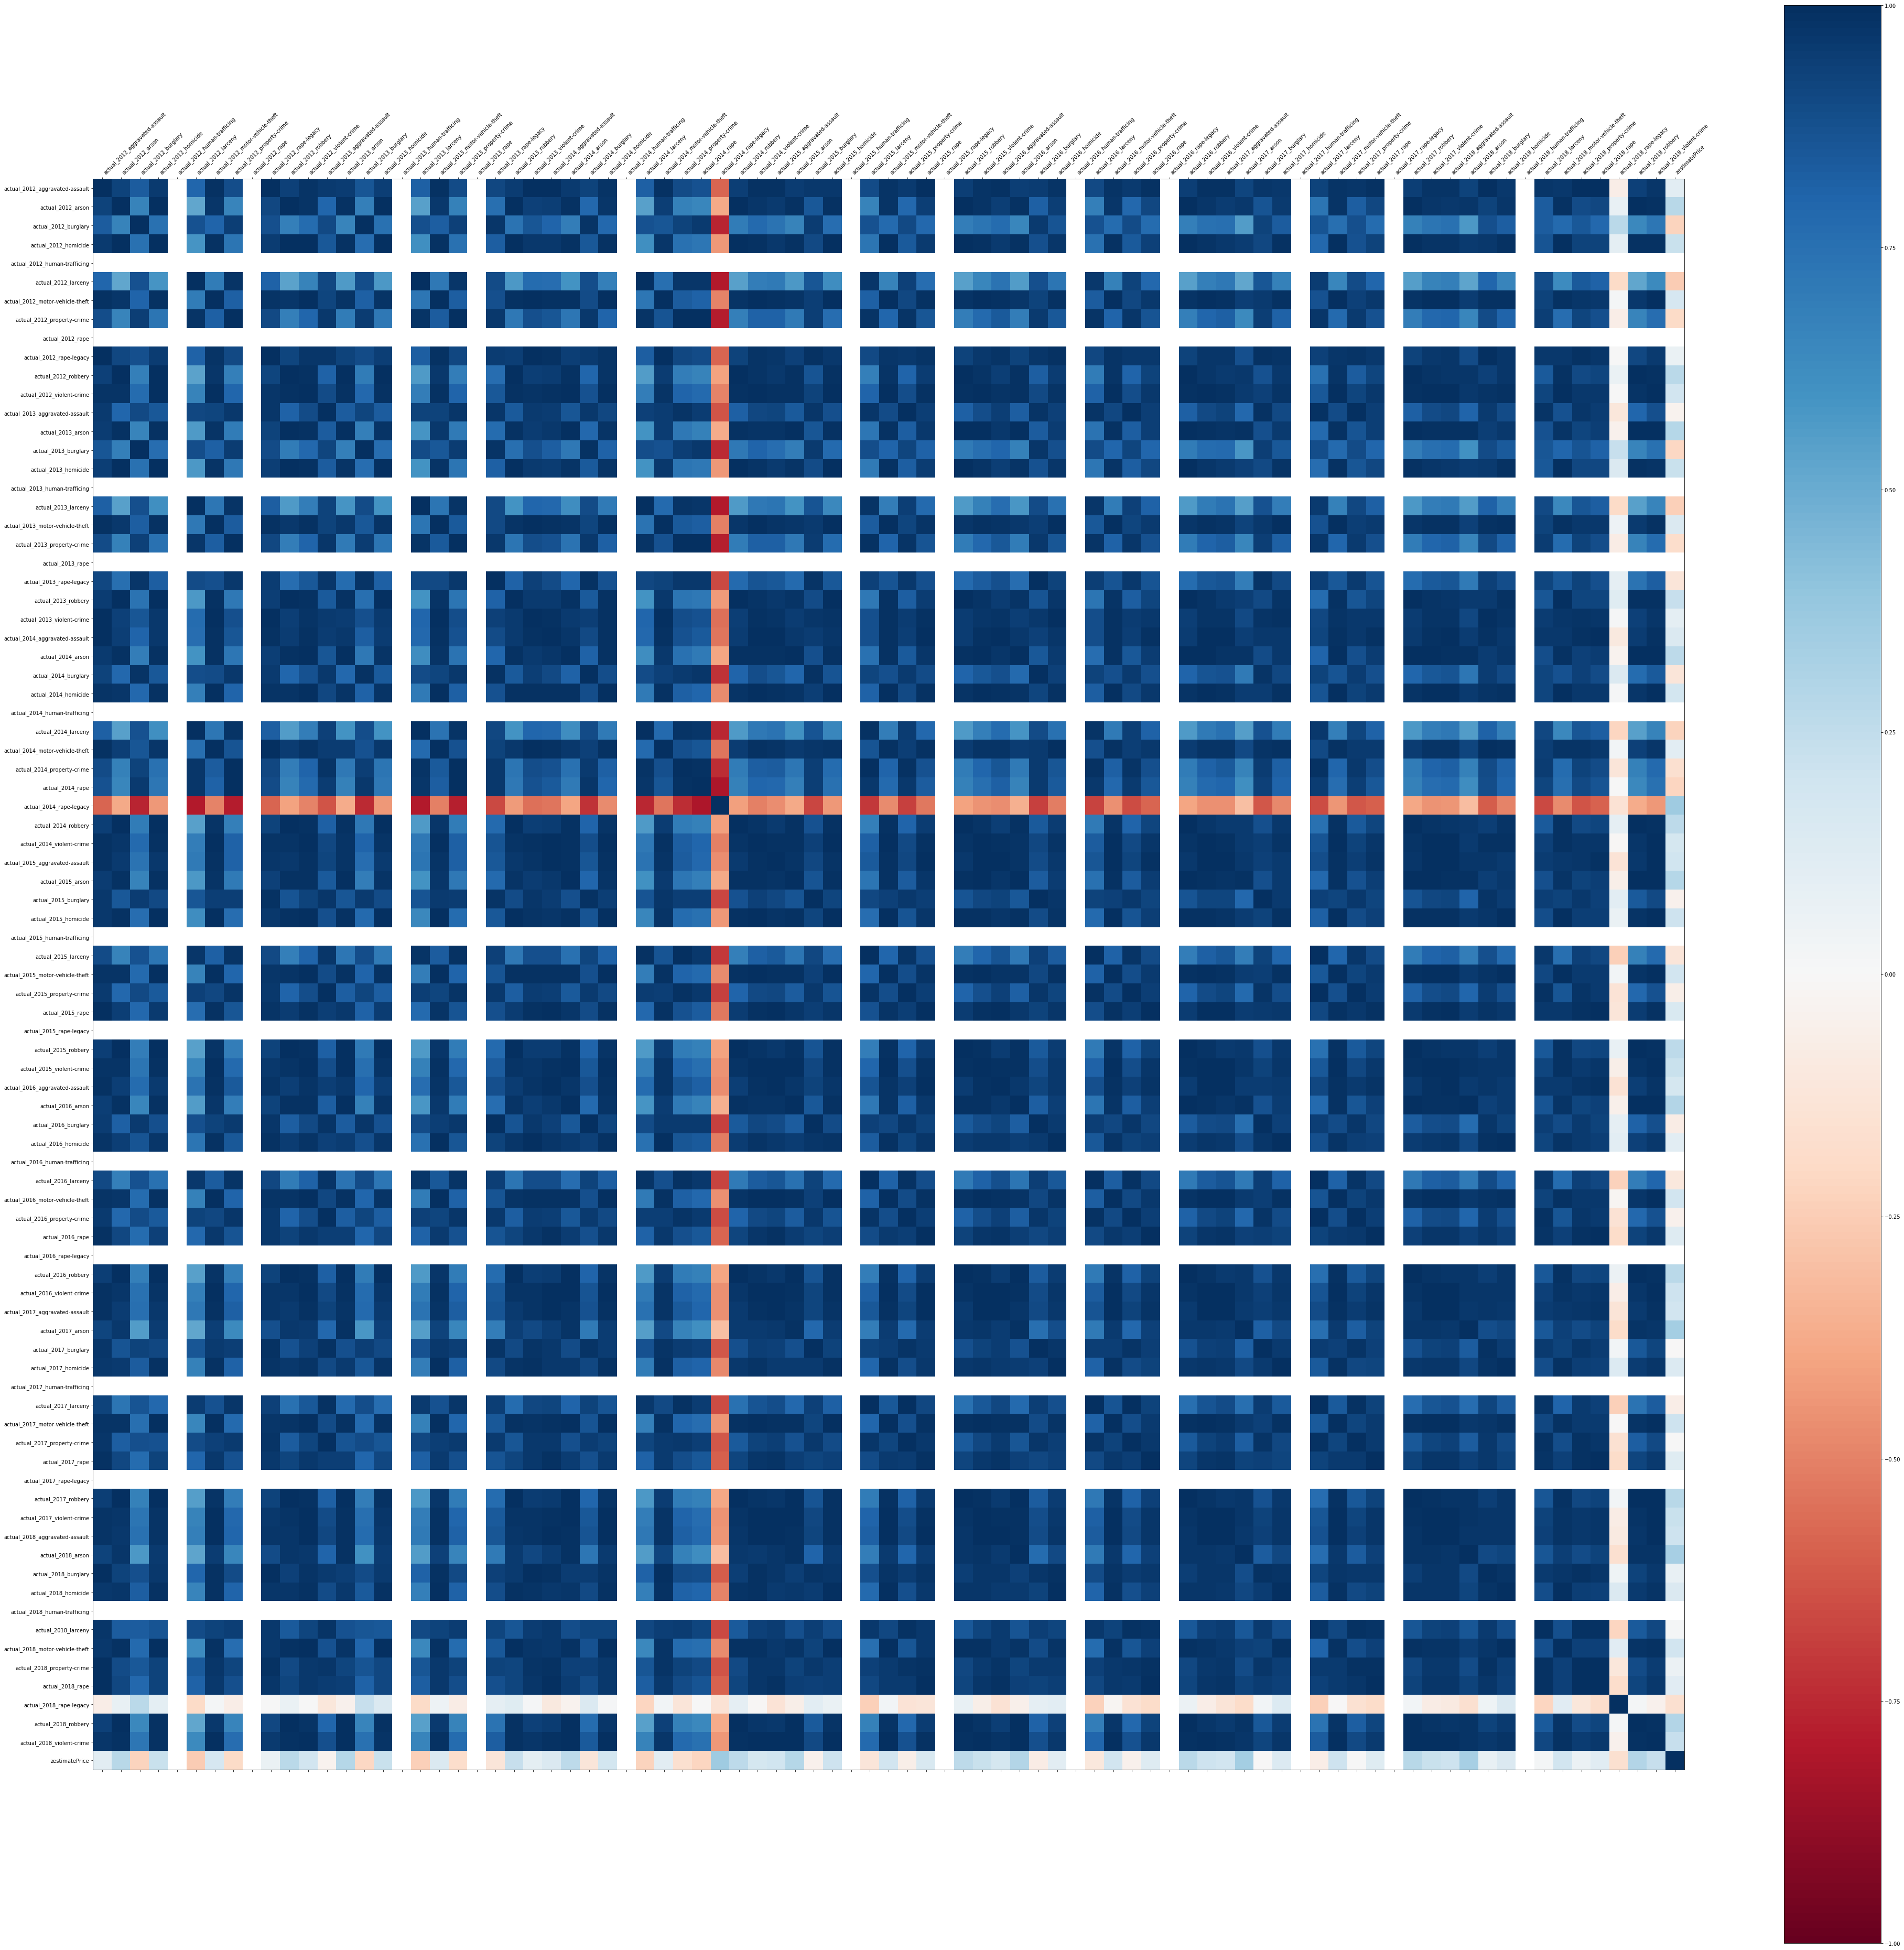

In [12]:
columns = list(df_data.columns.values[22:106])
showCorr(columns)

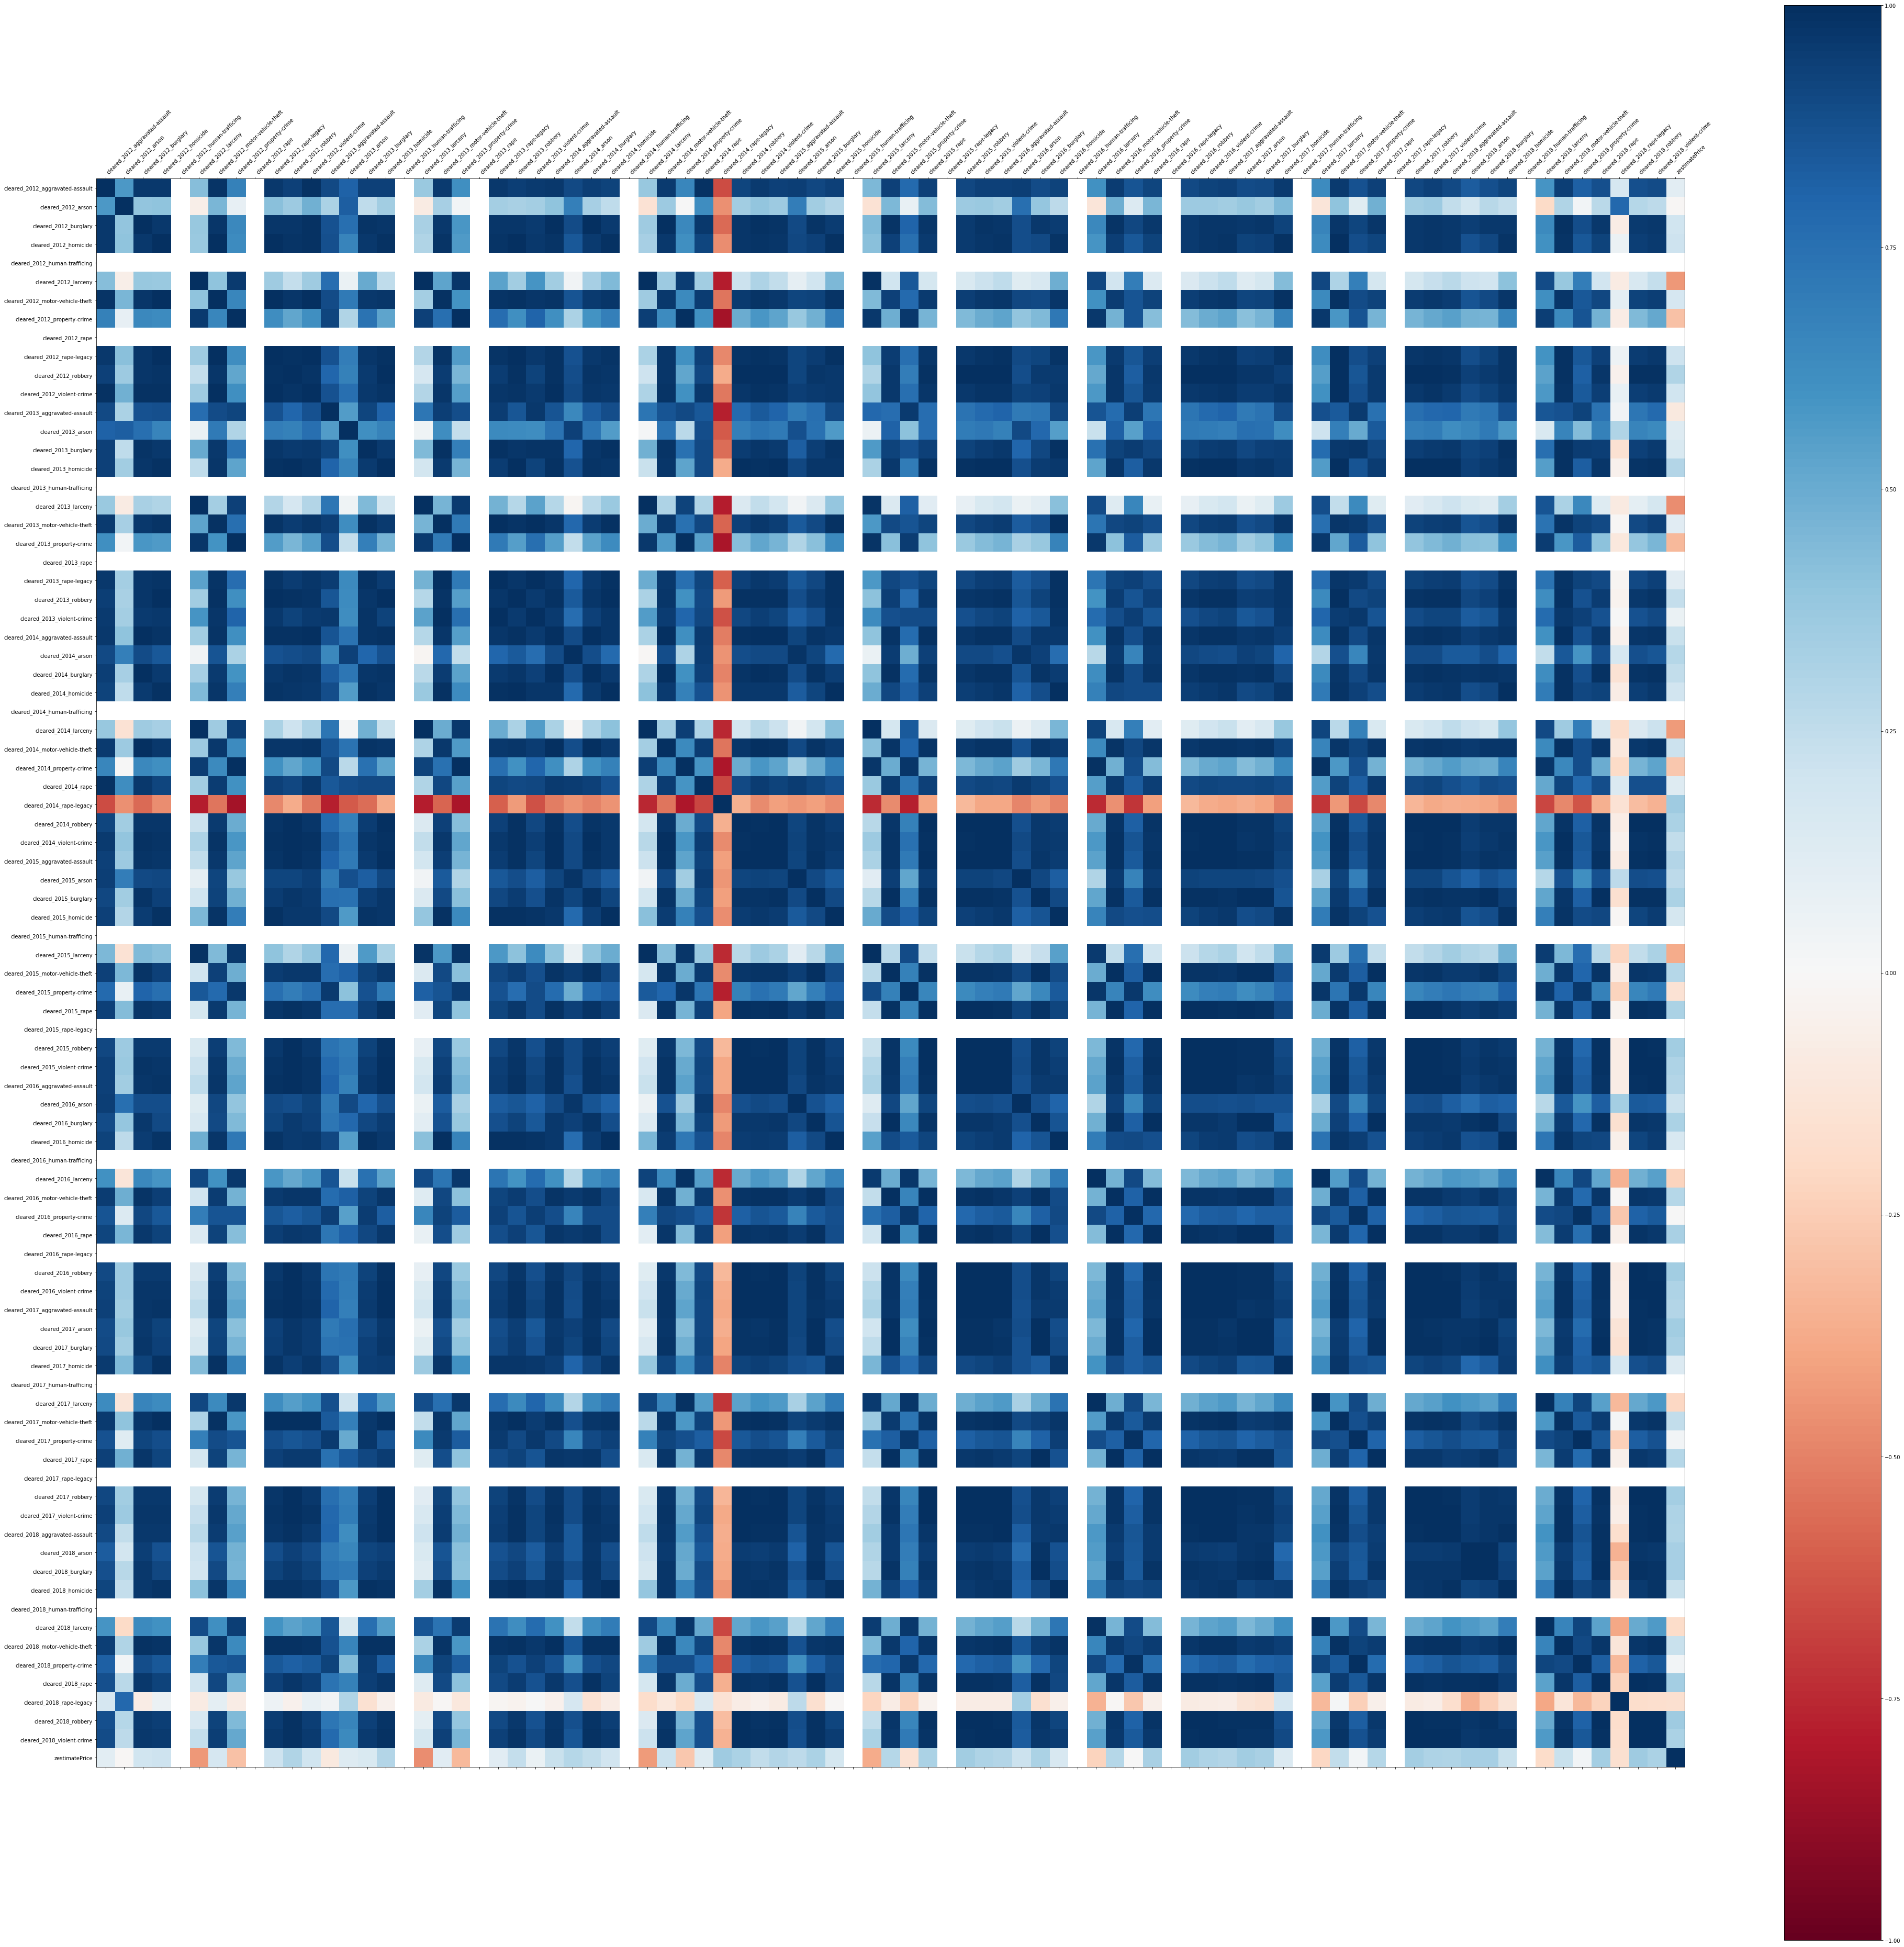

In [13]:
columns = list(df_data.columns.values[106:190])
showCorr(columns)

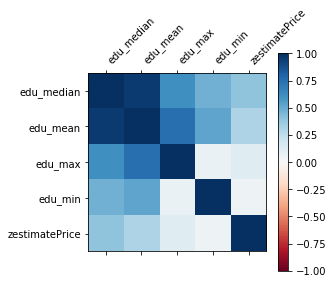

In [14]:
columns = list(df_data.columns.values[190:194])
showCorr(columns)

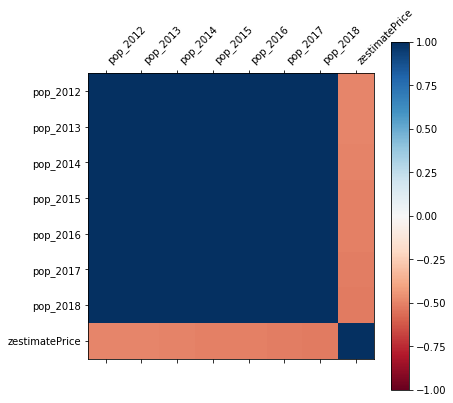

In [15]:
columns = list(df_data.columns.values[194:201])
showCorr(columns)

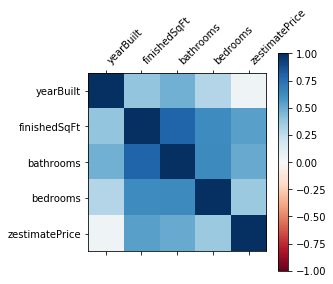

In [16]:
columns = list(df_data.columns.values[201:-1])
showCorr(columns)